findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


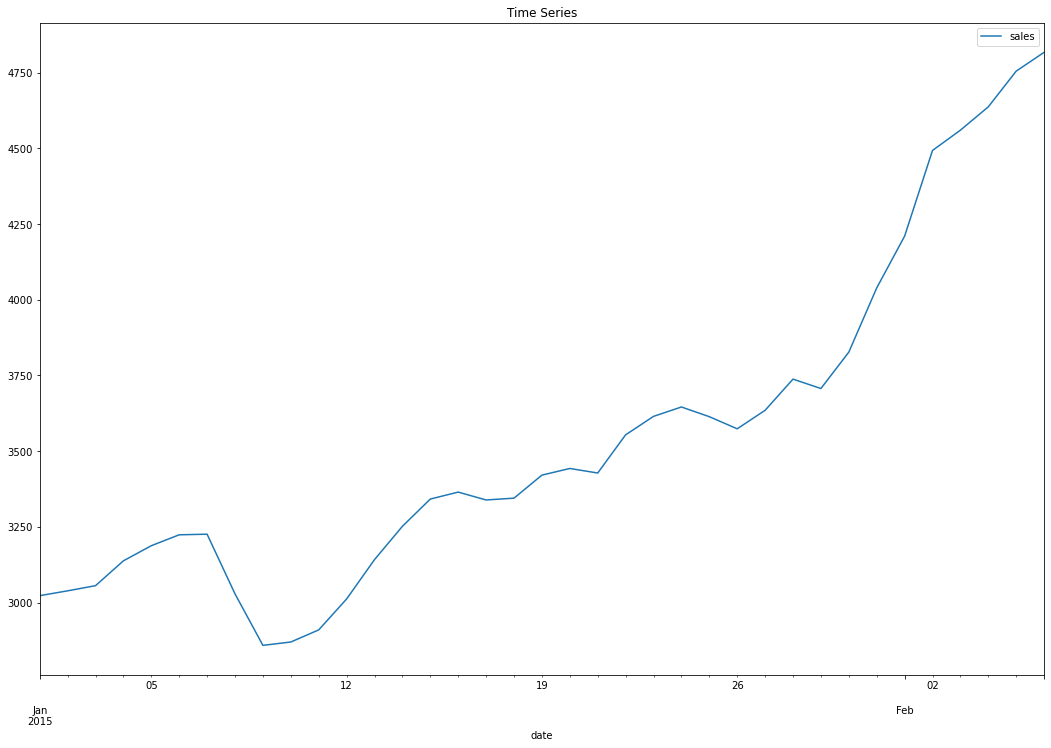

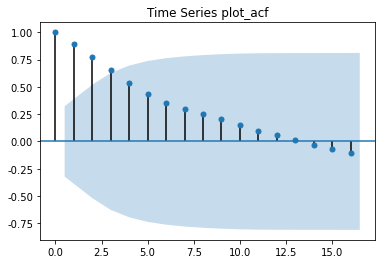

原始序列的ADF检验结果为： (1.8137710150945272, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.4698986602418)


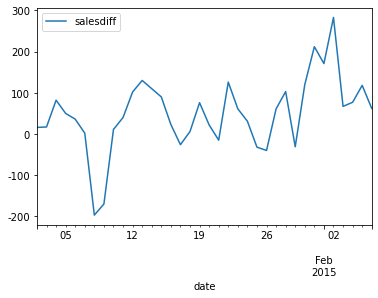

1阶差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


<ipython-input-1-36bad881b113>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()
<ipython-input-1-36bad881b113>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show()


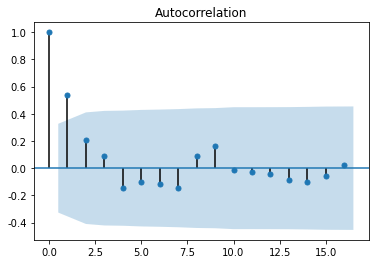

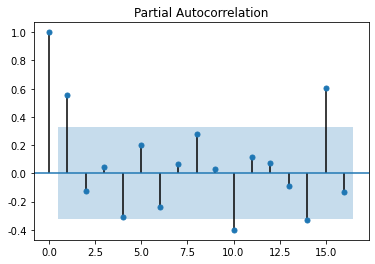

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
filename='arima_data.xls'
forrecastnum=5
data=pd.read_excel(filename,index_col=u'date')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data.plot(figsize=(18, 12))
plt.title('Time Series')
plt.show()
plot_acf(data)
plt.title('Time Series plot_acf')
plt.show()
print(u'原始序列的ADF检验结果为：',ADF(data[u'sales']))
D_data=data.diff(periods=1).dropna()
D_data.columns=[u'salesdiff']
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'1阶差分序列的ADF检验结果为：',ADF(D_data[u'salesdiff']))

In [2]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：',acorr_ljungbox(D_data,lags=1))
from statsmodels.tsa.arima_model import ARIMA
data[u'销量'] = data[u'销量'].astype(float)
pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)
p,q=bic_matrix.stack().idxmin()
print(u'bic最小的P值和q值为：%s、%s'%(p,q))


,销量
日期,
2015-01-01,3023.0
2015-01-02,3039.0
2015-01-03,3056.0
2015-01-04,3138.0
2015-01-05,3188.0
2015-01-06,3224.0
2015-01-07,3226.0
2015-01-08,3029.0
2015-01-09,2859.0


In [ ]:
model=ARIMA(data,(p,1,q)).fit()
model.summary2()
forecast=model.forecast(5)
print(forecast)